In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrix, build_design_matrices

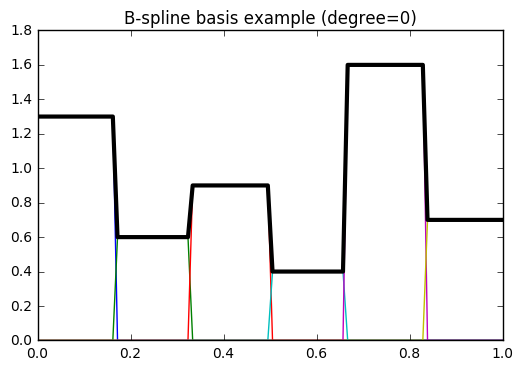

In [22]:
plt.title("B-spline basis example (degree=0)");
x = np.linspace(0., 1., 100)
y = dmatrix("bs(x, df=6, degree=0, include_intercept=True) - 1", {"x": x})
b = np.array([1.3, 0.6, 0.9, 0.4, 1.6, 0.7])
plt.plot(x, y*b);
plt.plot(x, np.dot(y, b), color='k', linewidth=3);

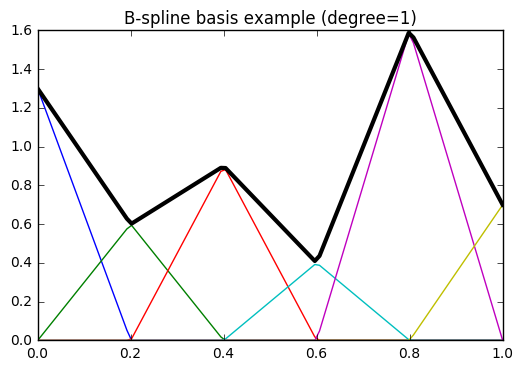

In [23]:
plt.title("B-spline basis example (degree=1)");
x = np.linspace(0., 1., 100)
y = dmatrix("bs(x, df=6, degree=1, include_intercept=True) - 1", {"x": x})
b = np.array([1.3, 0.6, 0.9, 0.4, 1.6, 0.7])
plt.plot(x, y*b);
plt.plot(x, np.dot(y, b), color='k', linewidth=3);

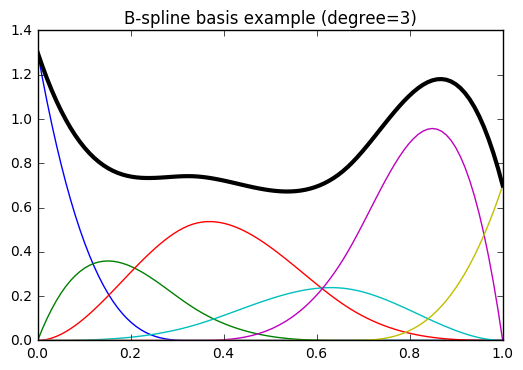

In [24]:
plt.title("B-spline basis example (degree=3)");
x = np.linspace(0., 1., 100)
y = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})
b = np.array([1.3, 0.6, 0.9, 0.4, 1.6, 0.7])
plt.plot(x, y*b);
plt.plot(x, np.dot(y, b), color='k', linewidth=3);

In [25]:
data = {"x": np.linspace(0., 1., 100)}
design_matrix = dmatrix("bs(x, df=4)", data)
new_data = {"x": [0.1, 0.25, 0.9]}
build_design_matrices([design_matrix.design_info], new_data)[0]

DesignMatrix with shape (3, 5)
  Intercept  bs(x, df=4)[0]  bs(x, df=4)[1]  bs(x, df=4)[2]  bs(x, df=4)[3]
          1         0.43400           0.052         0.00200           0.000
          1         0.59375           0.250         0.03125           0.000
          1         0.00200           0.052         0.43400           0.512
  Terms:
    'Intercept' (column 0)
    'bs(x, df=4)' (columns 1:5)

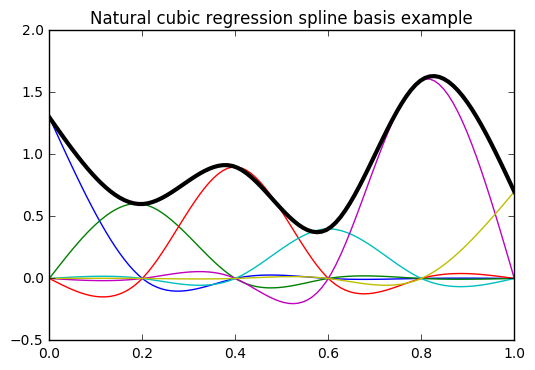

In [26]:
plt.title("Natural cubic regression spline basis example");
y = dmatrix("cr(x, df=6) - 1", {"x": x})
plt.plot(x, y*b);
plt.plot(x, np.dot(y, b), color='k', linewidth=3);

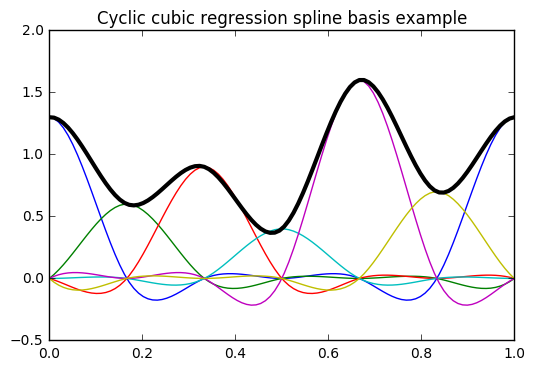

In [27]:
plt.title("Cyclic cubic regression spline basis example");
y = dmatrix("cc(x, df=6) - 1", {"x": x})
plt.plot(x, y*b);
plt.plot(x, np.dot(y, b), color='k', linewidth=3);

In [28]:
design_matrix = dmatrix("cr(x, df=4, constraints='center')", data)
new_design_matrix = build_design_matrices([design_matrix.design_info], new_data)[0]
new_design_matrix
np.asarray(new_design_matrix)

array([[ 1.        ,  0.15855682, -0.5060419 , -0.40944318, -0.16709613],
       [ 1.        ,  0.71754625, -0.22956933, -0.28245375, -0.10215042],
       [ 1.        , -0.1602992 , -0.30354568,  0.4077008 ,  0.43900769]])